In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
data = pd.read_csv("classification.csv")

In [39]:
data.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [40]:
data.tail()

,age,interest,success
292,27.697220,18.799309,0.0
293,15.150959,72.000352,1.0
294,22.264378,68.453459,1.0
295,25.677420,90.118212,1.0
296,21.215594,48.265520,1.0


In [41]:
data.shape

(297, 3)

In [42]:
data.nunique()

age         297
interest    297
success       2
dtype: int64

In [43]:
data.isnull().sum()

age         0
interest    0
success     0
dtype: int64

In [44]:
data.describe()

,age,interest,success
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   interest  297 non-null    float64
 2   success   297 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB


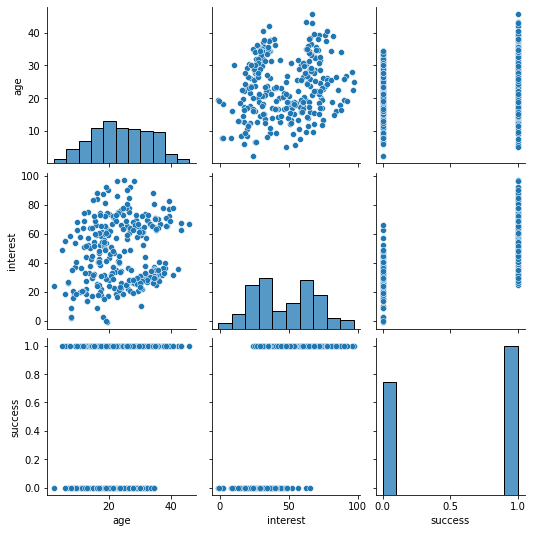

In [46]:
sns.pairplot(data)

<AxesSubplot:>

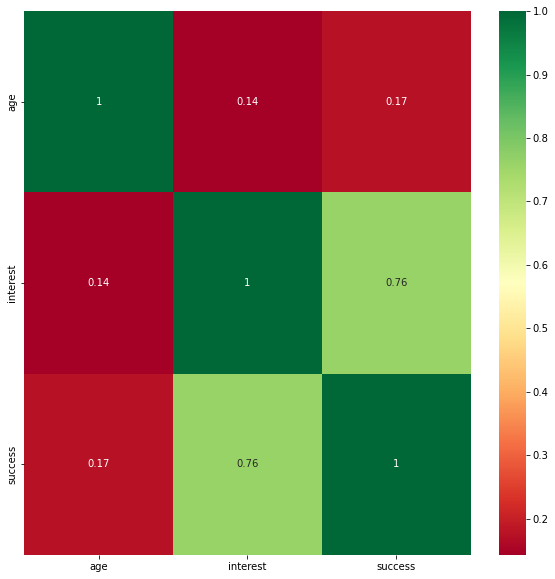

In [47]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heatmap
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [51]:
data['success'].value_counts()

1.0    169
0.0    128
Name: success, dtype: int64

(array([ 5., 18., 32., 57., 45., 40., 43., 39., 14.,  4.]),
 array([ 2.34755994,  6.69017682, 11.0327937 , 15.37541058, 19.71802746,
        24.06064435, 28.40326123, 32.74587811, 37.08849499, 41.43111187,
        45.77372876]),
 <BarContainer object of 10 artists>)

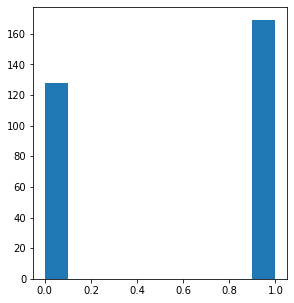

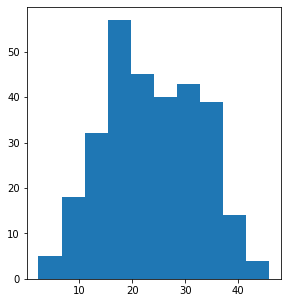

In [53]:
fig1 = plt.figure(figsize=(10, 5))
fig2 = plt.figure(figsize=(10, 5))
f1 = fig1.add_subplot(121)
f2 = fig2.add_subplot(122)
f1.hist(data['success'])
f2.hist(data['age'])

<AxesSubplot:ylabel='age'>

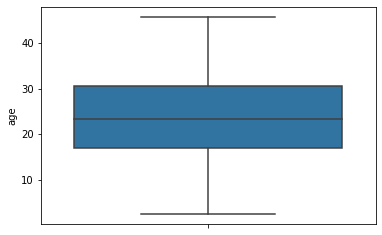

In [55]:
sns.boxplot(y='age',data=data)

<AxesSubplot:ylabel='interest'>

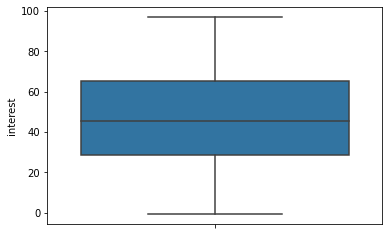

In [56]:
sns.boxplot(y='interest',data=data)

In [57]:
X = data.drop(columns='success', axis=1)
Y = data['success']

In [58]:
print(Y)

0      0.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
292    0.0
293    1.0
294    1.0
295    1.0
296    1.0
Name: success, Length: 297, dtype: float64


In [59]:
print(X)

           age   interest
0    23.657801  18.859917
1    22.573729  17.969223
2    32.553424  29.463651
3     6.718035  25.704665
4    14.401919  16.770856
..         ...        ...
292  27.697220  18.799309
293  15.150959  72.000352
294  22.264378  68.453459
295  25.677420  90.118212
296  21.215594  48.265520

[297 rows x 2 columns]


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(297, 2) (237, 2) (60, 2)


In [62]:
model = LogisticRegression()

In [63]:
model.fit(X_train, Y_train)

LogisticRegression()

In [64]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8776371308016878
